In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
class Card:
    def __init__(self, number, symbol):
        self.number = number
        self.symbol = symbol

def shuffle(deck, seed=None):
    if seed is not None:
        random.seed(seed)
    random.shuffle(deck)

def find_hand_value(hand):
    value = 0
    aces_count = 0

    for card in hand:
        if card.number == "A":
            aces_count += 1
            value += 11  
        elif card.number in ["J", "Q", "K"]:
            value += 10
        else:
            value += int(card.number)

    while value > 21 and aces_count > 0:
        value -= 10  
        aces_count -= 1

    return value

In [3]:
def simulation(times):
    cash = 1000000000000
    start_amount = cash
    betting_unit = 1000
    number_of_decks = 6
    refresh_threshold = 70
    
    win_count = 0
    lose_count = 0
    tie_count = 0
    player_busted_count = 0
    dealer_busted_count = 0
    cash_history = []  

    symbols = ["spade", "heart", "diamond", "club"]
    values = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]

    round = 1
    while True:
        if round > times:
            break

        deck = []

        for _ in range(number_of_decks):
            for symbol in symbols:
                for value in values:
                    card = Card(value, symbol)
                    deck.append(card)

        shuffle(deck)

        while len(deck) > 52 * number_of_decks * refresh_threshold / 100:
            if round > times:
                break

            cash_history.append(cash)
            
            player_hand = []
            dealer_hand = []

            bet = betting_unit
            cash -= bet  

            if len(deck) < 4:
                break

            player_hand.append(deck.pop())
            player_hand.append(deck.pop())
            dealer_hand.append(deck.pop())
            dealer_hand.append(deck.pop())

            player_hand_value = find_hand_value(player_hand)
            if player_hand_value == 21:
                cash += bet * 2.5
                win_count += 1 
                round += 1
                continue

            player_hand_value = find_hand_value(player_hand)
            while player_hand_value < 17:
                if len(deck) == 0:
                    break
                card = deck.pop()
                player_hand.append(card)
                player_hand_value = find_hand_value(player_hand)

            if player_hand_value > 21:
                player_card_text = ", ".join([f"{card.number} {card.symbol}" for card in player_hand])
                player_busted_count += 1  
                lose_count += 1  
                round += 1
                continue

            dealer_hand_value = find_hand_value(dealer_hand)
            while dealer_hand_value < 17:
                if len(deck) == 0: 
                    break
                card = deck.pop()
                dealer_hand.append(card)
                dealer_hand_value = find_hand_value(dealer_hand)

            if dealer_hand_value > 21:
                cash += bet * 2
                dealer_busted_count += 1 
                win_count += 1  
            elif player_hand_value > dealer_hand_value:
                cash += bet * 2
                win_count += 1  
            elif player_hand_value < dealer_hand_value:
                lose_count += 1  
            else:
                cash += bet  
                tie_count += 1 

            round += 1

    print(f"Total round: {round-1}")
    print(f"Total cash: {cash}")
    print(f"Start Amount: {start_amount}")
    print(f"Profit: {cash - start_amount}")
    print(f"Win: {win_count}")
    print(f"Lose: {lose_count}")
    print(f"Tie: {tie_count}")
    print(f"Player busted: {player_busted_count}")
    print(f"Dealer busted: {dealer_busted_count}")
    print(f"Win Rate: {win_count/times}")
    print(f"Lose Rate: {lose_count/times}")
    print(f"Tie Rate: {tie_count/times}")
    print(f"Dealer Busted : Player Busted  =  1 : {player_busted_count/dealer_busted_count}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(cash_history)
    plt.xlabel('Round')
    plt.ylabel('Cash')
    plt.title('Cash History')
    plt.show()

Total round: 10
Total cash: 1000000001000
Start Amount: 1000000000000
Profit: 1000
Win: 5
Lose: 4
Tie: 1
Player busted: 3
Dealer busted: 4
Win Rate: 0.5
Lose Rate: 0.4
Tie Rate: 0.1
Dealer Busted : Player Busted  =  1 : 0.75


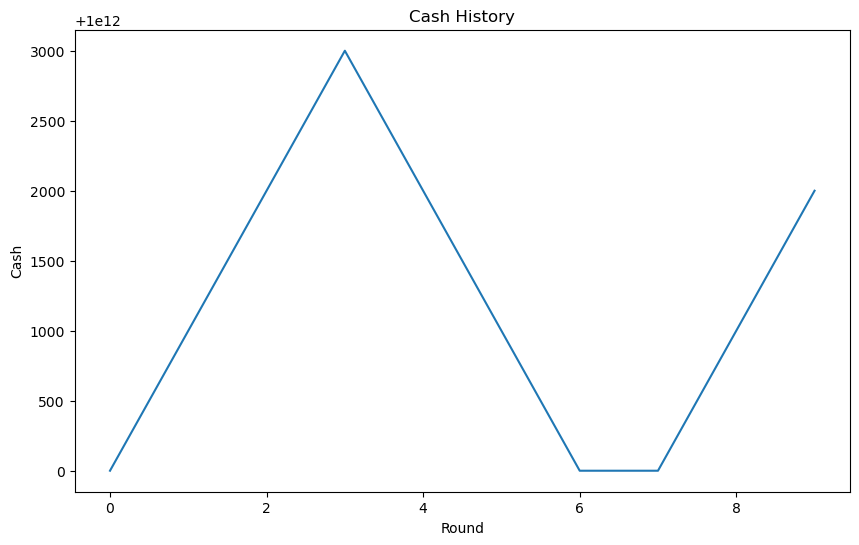

In [4]:
simulation(10)

Total round: 100
Total cash: 999999999500.0
Start Amount: 1000000000000
Profit: -500.0
Win: 43
Lose: 47
Tie: 10
Player busted: 26
Dealer busted: 21
Win Rate: 0.43
Lose Rate: 0.47
Tie Rate: 0.1
Dealer Busted : Player Busted  =  1 : 1.2380952380952381


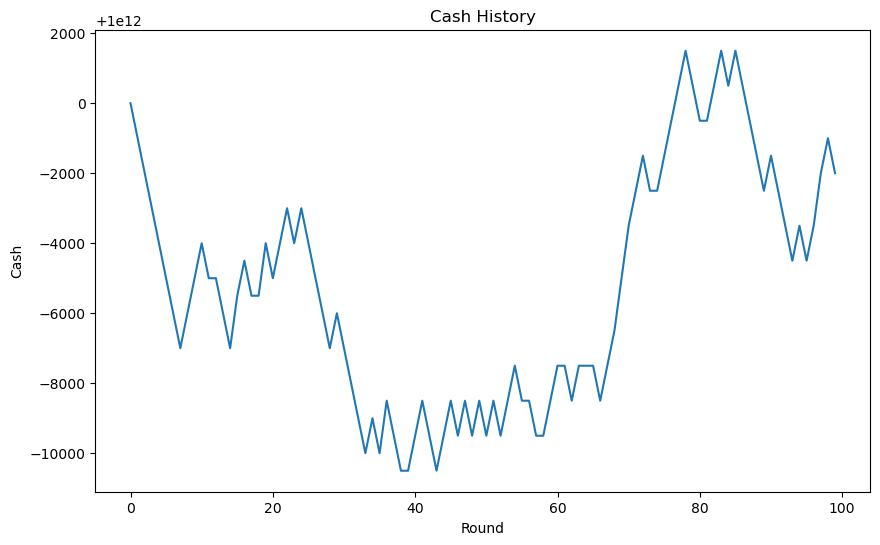

In [5]:
simulation(100)

Total round: 1000
Total cash: 999999951500.0
Start Amount: 1000000000000
Profit: -48500.0
Win: 416
Lose: 485
Tie: 99
Player busted: 305
Dealer busted: 202
Win Rate: 0.416
Lose Rate: 0.485
Tie Rate: 0.099
Dealer Busted : Player Busted  =  1 : 1.50990099009901


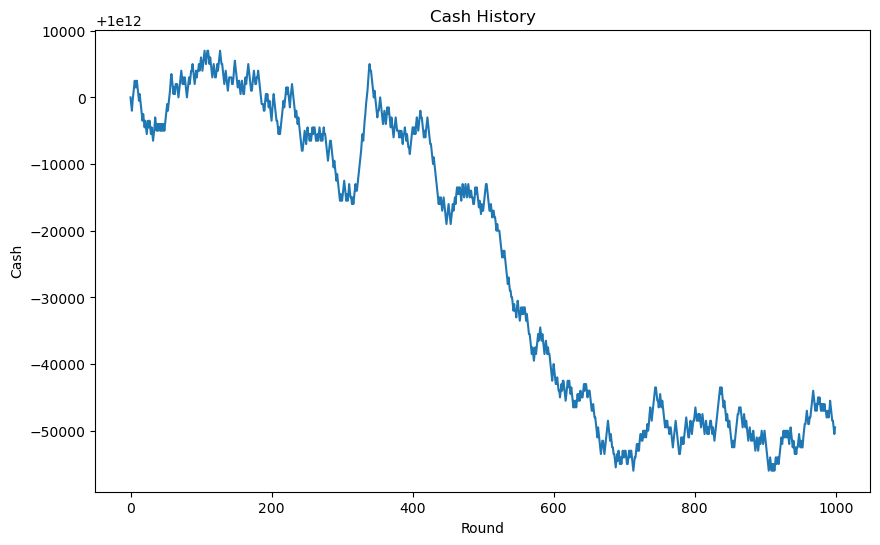

In [6]:
simulation(1000)

Total round: 10000
Total cash: 999999410500.0
Start Amount: 1000000000000
Profit: -589500.0
Win: 4098
Lose: 4908
Tie: 994
Player busted: 2818
Dealer busted: 1854
Win Rate: 0.4098
Lose Rate: 0.4908
Tie Rate: 0.0994
Dealer Busted : Player Busted  =  1 : 1.5199568500539373


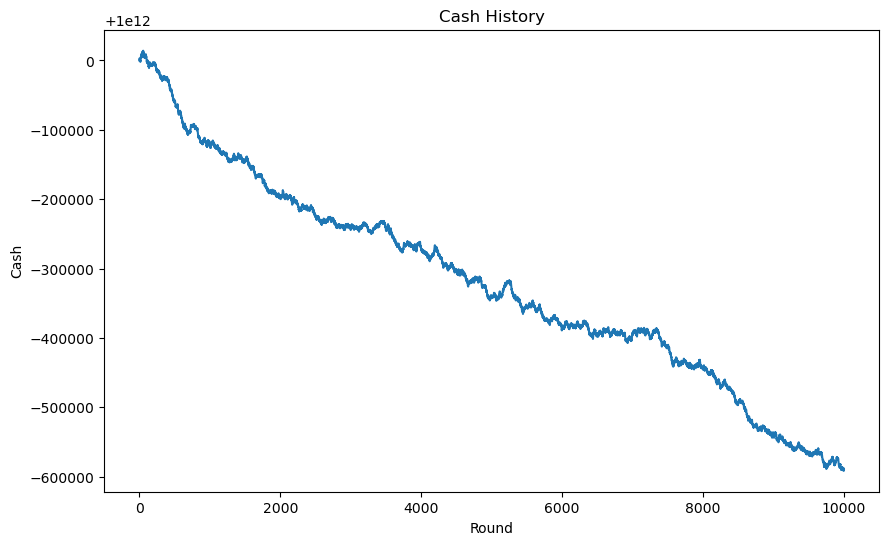

In [7]:
simulation(10000)

Total round: 100000
Total cash: 999995569000.0
Start Amount: 1000000000000
Profit: -4431000.0
Win: 41624
Lose: 48475
Tie: 9901
Player busted: 28023
Dealer busted: 19195
Win Rate: 0.41624
Lose Rate: 0.48475
Tie Rate: 0.09901
Dealer Busted : Player Busted  =  1 : 1.4599114352696014


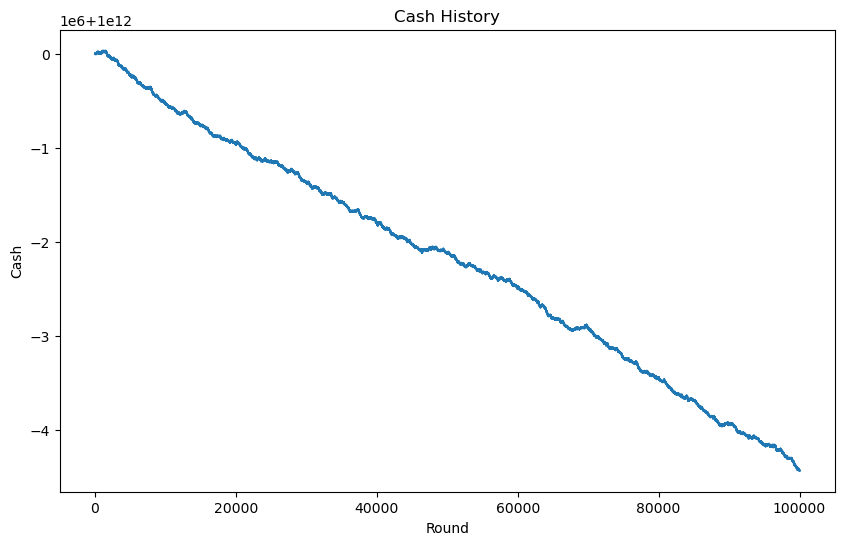

In [8]:
simulation(100000)

Total round: 1000000
Total cash: 999948599000.0
Start Amount: 1000000000000
Profit: -51401000.0
Win: 413061
Lose: 488272
Tie: 98667
Player busted: 283076
Dealer busted: 188693
Win Rate: 0.413061
Lose Rate: 0.488272
Tie Rate: 0.098667
Dealer Busted : Player Busted  =  1 : 1.500193435898523


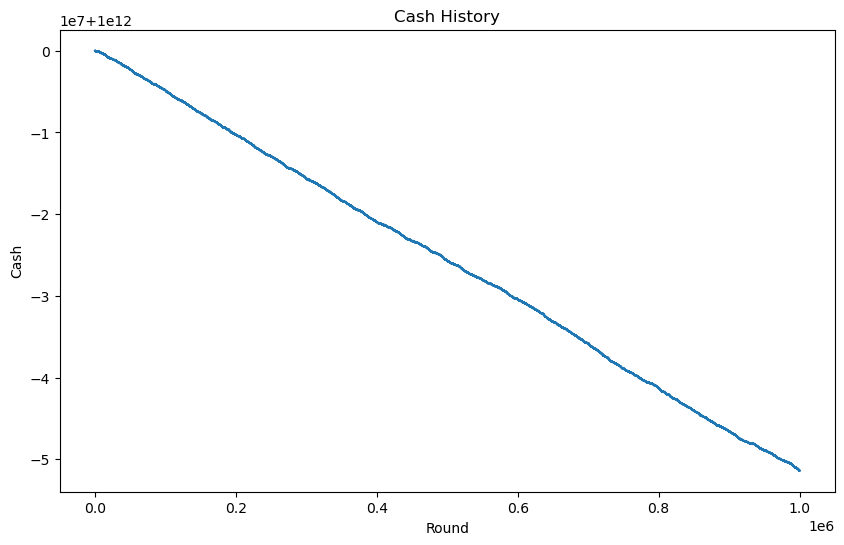

In [9]:
simulation(1000000)

Total round: 10000000
Total cash: 999498651000.0
Start Amount: 1000000000000
Profit: -501349000.0
Win: 4135047
Lose: 4873692
Tie: 991261
Player busted: 2819749
Dealer busted: 1890987
Win Rate: 0.4135047
Lose Rate: 0.4873692
Tie Rate: 0.0991261
Dealer Busted : Player Busted  =  1 : 1.491151975132563


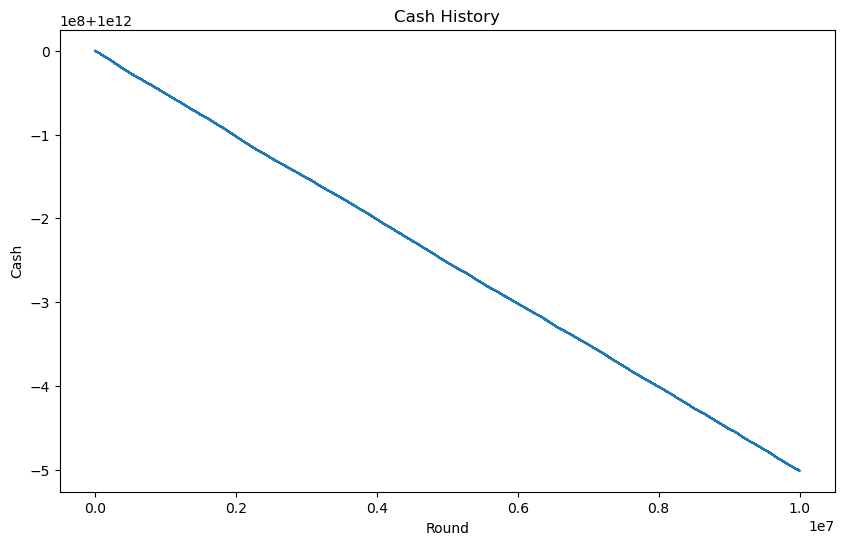

In [10]:
simulation(10000000)